Sebelumnya import library-library yang diperlukan terdahulu

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.1 MB/s eta 0:00:00


In [ ]:
#Import data dari google drive kita, jadi diinisiasi dulu setupnya sebaga berikut
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Google Drive akan dihubungkan ke sesi Colab pada direktori yang ditentukan (dalam contoh ini, di dalam direktori /content/drive). Ini memungkinkan untuk mengakses file yang ada di Google Drive langsung dari notebook Colab.

## Data Understanding

In [ ]:
# Load data from Excel file

file_path = "/content/drive/MyDrive/Kalbe/Ilapak 12 (September-November).xlsx" #Mendefinisikan variabel file_path yang berisi jalur file Excel yang akan dimuat

data = pd.read_excel(file_path) #Menggunakan fungsi read_excel dari pandas untuk membaca file Excel di jalur yang telah ditentukan (file_path) dan menyimpannya ke dalam variabel data.

data.head() #Menggunakan metode head() pada DataFrame untuk menampilkan beberapa baris pertama dari data yang telah dimuat

,id,times,Shift,Status,Suhu Sealing Vertikal Bawah (oC),Suhu Sealing Vertical Atas (oC),Suhu Sealing Horizontal Depan/Kanan (oC),Suhu Sealing Horizontal Belakang/Kiri (oC)
0,99943,2023-09-01 06:29:25,0,0,0.0,0.0,0.0,0.0
1,99944,2023-09-01 06:31:14,3,1,43.1,38.2,50.8,53.6
2,99945,2023-09-01 06:36:14,3,1,91.5,91.6,144.7,150.5
3,99946,2023-09-01 06:41:14,3,1,132.3,129.5,208.0,212.2
4,99947,2023-09-01 06:46:14,1,1,164.0,158.2,229.8,229.7


In [ ]:
data['times'] = pd.to_datetime(data['times']) #Baris kode ini digunakan untuk mengonversi kolom dengan nama 'times' dalam DataFrame data menjadi tipe data datetime menggunakan fungsi pd.to_datetime

In [ ]:
def overview(data: pd.DataFrame, timestamp_col: str = None) -> None:
    print('Null Count:\n', data.isnull().sum(),'\n')
    print('Data Types:\n', data.dtypes)

    if timestamp_col is not None:
        print('\nDate Range:\n\nStart:\t',data[timestamp_col].min())
        print('End:\t',data[timestamp_col].max())
        print('Days:\t',(data[timestamp_col].max() - data[timestamp_col].min()))

In [ ]:
overview(data, timestamp_col='times')

Null Count:
 id                                            0
times                                         0
Shift                                         0
Status                                        0
Suhu Sealing Vertikal Bawah (oC)              0
Suhu Sealing Vertical Atas (oC)               0
Suhu Sealing Horizontal Depan/Kanan (oC)      0
Suhu Sealing Horizontal Belakang/Kiri (oC)    0
dtype: int64 

Data Types:
 id                                                     int64
times                                         datetime64[ns]
Shift                                                  int64
Status                                                 int64
Suhu Sealing Vertikal Bawah (oC)                     float64
Suhu Sealing Vertical Atas (oC)                      float64
Suhu Sealing Horizontal Depan/Kanan (oC)             float64
Suhu Sealing Horizontal Belakang/Kiri (oC)           float64
dtype: object

Date Range:

Start:	 2023-09-01 06:29:25
End:	 2023-11-29 07:58:19
Days:

Fungsi overview digunakan untuk memberikan gambaran umum tentang DataFrame, termasuk informasi tentang missing values, tipe data, dan jika kolom timestamp diberikan, juga rentang tanggal.

Bisa dilihat dari data Output diatas, Bahwa di dalam dataset tersebut Memiliki 3 jenis Data Type (dtypes: float64(4), int64(1), datetime64[ns])

* times = datetime64[ns]
* Shift = int64
* Suhu Sealing Vertikal Bawah = float64
* Suhu Sealing Vertical Atas= float64
* Suhu Sealing Horizontal Depan/Kanan = float64
* Suhu Sealing Horizontal Belakang/Kiri = float64

**Drop Unnecessary Columns/Rows**

In [ ]:
# Select relevant columns and rename them
df = data[['times','Suhu Sealing Vertikal Bawah (oC)', 'Suhu Sealing Vertical Atas (oC)']].rename(columns={'Suhu Sealing Vertikal Bawah (oC)': 'suhu_sealing_vertical_bawah', 'times': 'datetime', 'Suhu Sealing Vertical Atas (oC)': 'suhu_sealing_vertical_atas'})

In [ ]:
df.head()

,datetime,suhu_sealing_vertical_bawah,suhu_sealing_vertical_atas
0,2023-09-01 06:29:25,0.0,0.0
1,2023-09-01 06:31:14,43.1,38.2
2,2023-09-01 06:36:14,91.5,91.6
3,2023-09-01 06:41:14,132.3,129.5
4,2023-09-01 06:46:14,164.0,158.2


Kode ini memilih kolom-kolom tertentu dari DataFrame data, yaitu 'times', 'Suhu Sealing Vertikal Bawah (oC)', dan 'Suhu Sealing Vertikal Bawah (oC)', kemudian mengganti nama kolom-kolom tersebut. Hasilnya disimpan dalam variabel df.

Kolom 'Suhu Sealing Vertikal Bawah (oC)' diubah namanya menjadi 'suhu_sealing_vertical_bawah', kolom 'Suhu Sealing Vertikal Bawah (oC)' diubah menjadi kolom 'suhu_sealing_vertical_atas', dan 'times' diubah namanya menjadi 'datetime'. Hasilnya adalah DataFrame baru yang hanya berisi tiga kolom dengan nama yang telah diubah.

Variabel df sekarang berisi DataFrame yang hanya memiliki dua kolom yang dipilih dari data dan nama kolomnya telah diubah sesuai dengan instruksi dalam metode rename().

In [ ]:
print("Rows and Columns = ", df.shape) #Ini memberikan informasi tentang ukuran (dimensi) DataFrame df.

Rows and Columns =  (7622, 3)


**Deskripsi Statistik**

In [ ]:
df.head()

,datetime,suhu_sealing_vertical_bawah,suhu_sealing_vertical_atas
0,2023-09-01 06:29:25,0.0,0.0
1,2023-09-01 06:31:14,43.1,38.2
2,2023-09-01 06:36:14,91.5,91.6
3,2023-09-01 06:41:14,132.3,129.5
4,2023-09-01 06:46:14,164.0,158.2


In [ ]:
df.dtypes

datetime                       datetime64[ns]
suhu_sealing_vertical_bawah           float64
suhu_sealing_vertical_atas            float64
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
suhu_sealing_vertical_bawah,7622.0,222.565783,45.036489,0.0,234.2,234.4,239.0,243.0
suhu_sealing_vertical_atas,7622.0,218.052125,67.948703,-2313.1,229.2,229.4,234.2,245.7


Ini menggunakan metode describe() pada DataFrame untuk menghasilkan ringkasan statistik dari kolom-kolom numerik. T berarti melakukan tranposisi, sehingga ringkasan statistik ditransposisikan agar lebih mudah dibaca. Metode describe() memberikan informasi seperti mean (rata-rata), std (standar deviasi), min (nilai minimum), Q1 (kuartil pertama), median (median atau Q2), Q3 (kuartil ketiga), dan max (nilai maksimum) untuk setiap kolom numerik.

* count: Jumlah non-null (tidak-missing) entri dalam kolom 'suhu_sealing_vertical_bawah' dan 'suhu_sealing_vertical_atas' jumlahnya adalah 7622.

* mean: Nilai rata-rata dari kolom 'suhu_sealing_vertical_bawah' adalah 222.56 dan 'suhu_sealing_vertical_bawah' adalah 218.05.

* std: Standar deviasi memberikan indikasi seberapa tersebar nilai-nilai dalam data. Standar deviasi dari kolom 'suhu_sealing_vertical_bawah' adalah 45.036 dan 'suhu_sealing_vertical_atas' adalah 67.948.

* min: Nilai minimum dari kolom 'suhu_sealing_vertical_bawah' adalah 0 dan dan 'suhu_sealing_vertical_atas' adalah -2313.1.

* 25%: Kuartil pertama (Q1), yang merupakan nilai di bawahnya 25% dari data.

* 50%: Median atau kuartil kedua (Q2), yang merupakan nilai di bawahnya 50% dari data.

* 75%: Kuartil ketiga (Q3), yang merupakan nilai di bawahnya 75% dari data.

* max: Nilai maksimum dari kolom 'suhu_sealing_vertical_bawah' dan 'suhu_sealing_vertical_atas'.

Dari, deskripsi stastik tersebut dapat disimpulkan bahwa pada suhu sealing vertical atas terdapat nilai minimum yang ekstrim, yaitu 2313.1 derajat celcius. Nilai ekstrim ini dinamakan outlier, sehingga diperlukan data preprocessing untuk menangani outlier pada data suhu sealing vertical atas

## Data Visualization

**Suhu Sealing Vertikal Bawah**

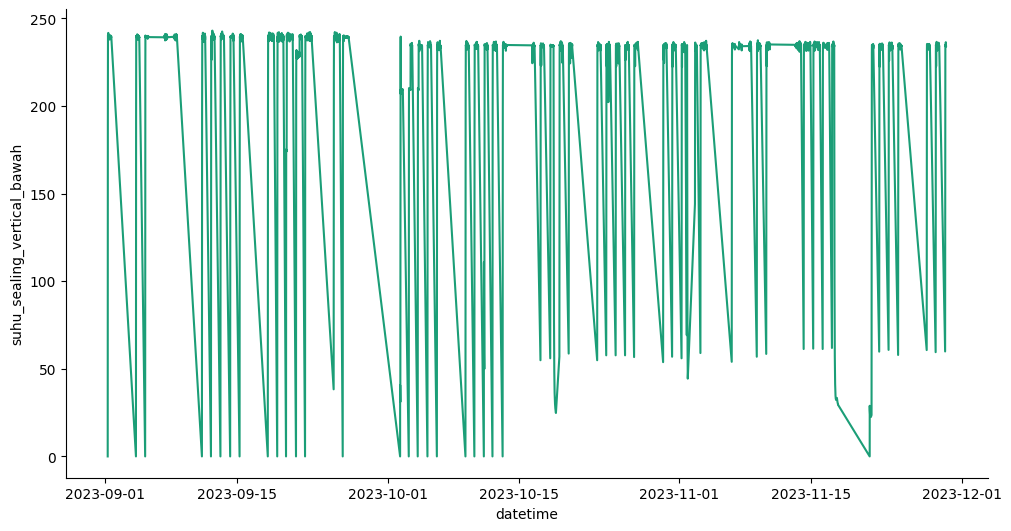

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['suhu_sealing_vertical_bawah']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('suhu_sealing_vertical_bawah')

**Suhu Sealing Vertical Atas**

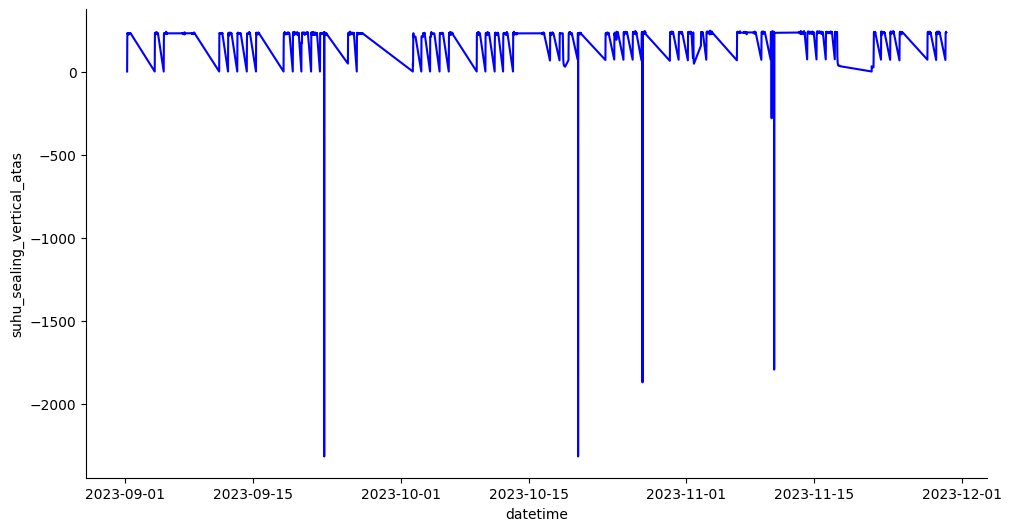

In [ ]:
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['datetime']
    ys = series['suhu_sealing_vertical_atas']

    plt.plot(xs, ys, label=series_name, color='blue')  # Change the color parameter to 'blue'

fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)  # Change layout='constrained' to constrained_layout=True
df_sorted = df.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('suhu_sealing_vertical_atas')

plt.show()

* Sumbu X: Sumbu X menunjukkan waktu, dalam satuan menit.
* Sumbu Y: Sumbu Y menunjukkan suhu, dalam satuan derajat Celcius.
* Garis: Garis pada grafik menunjukkan suhu sealing bawah pada interval 5 menit.
* Titik: Titik pada grafik menunjukkan nilai suhu sealing bawah pada interval 5 menit.

## Data Preprocessing

**Cek unique values**

In [ ]:
# Membuat fungsi unique_value() untuk mencetak nilai unik dari setiap kolom dalam dataframe
def unique_value():
    for i in df.columns:
        print(i, df[i].unique())
        print('\n')

# Memanggil fungsi unique_value() untuk mencetak nilai unik dari setiap kolom dalam dataframe
unique_value()

datetime ['2023-09-01T06:29:25.000000000' '2023-09-01T06:31:14.000000000'
 '2023-09-01T06:36:14.000000000' ... '2023-11-29T07:48:19.000000000'
 '2023-11-29T07:53:19.000000000' '2023-11-29T07:58:19.000000000']


suhu_sealing_vertical_bawah [  0.   43.1  91.5 132.3 164.  189.3 209.7 226.2 238.  240.3 239.9 238.5
 238.6 237.9 241.7 238.3 240.  239.3 239.4 239.6 239.1 239.2 239.5 239.
 240.2 239.7  46.4  94.2 135.  167.2 193.2 214.2 231.2 238.8 240.9 237.8
 240.5 238.7 240.1 238.4 239.8  64.4 111.6 148.4 177.6 201.2 220.1 234.6
 237.4 241.1 241.  240.8 238.1 240.4  29.5  77.3 118.4 150.1 175.1 195.2
 211.6 224.7 235.3 241.8 237.3 236.5 241.3  61.3 107.3 142.3 170.  192.1
 209.9 224.5 235.7 226.5 231.4 243.  237.7  32.6  81.1 121.2 152.1 177.1
 197.5 214.  227.4 236.9 241.4 242.5  23.7  66.3 110.  143.8 170.8 192.
 209.4 225.1 236.3 237.2 240.6  25.2  70.6 113.1 145.7 171.6 192.5 236.8
  26.4  73.4 115.  145.4 170.5 191.2 208.1 222.  233.  241.9 237.6 237.1
  47.2  94.3 131.  159.5 182.1 20

**Adjust outlier untuk Suhu Sealing Vertical Atas**

**Winsorization**

1. Tujuan:

    Proses winsorization bertujuan untuk menangani nilai outliers pada data dengan cara mengganti nilai-nilai ekstrim yang terlalu tinggi atau terlalu rendah dengan batas nilai atas (upper limit) dan batas nilai bawah (lower limit) yang telah ditentukan sebelumnya. Hal ini dilakukan untuk mengurangi dampak outliers terhadap analisis statistik data.

2. Fungsi:

    Fungsi winsorize() dari library pandas digunakan untuk menerapkan teknik winsorization pada data. Fungsi ini menerima parameter berupa:
      * Data series numeric yang akan diterapkan winsorization
      * Parameter limit bawah dan atas dalam bentuk desimal untuk menentukan batas nilai minimum dan maksimum. Dalam hal ini menggunakan 2.5% dan 97.5%.

3. Cara Kerja:
    
    Secara umum, fungsi winsorize() akan :
      * Mengurutkan data dari nilai terkecil hingga nilai terbesar
      * Mengidentifikasi nilai pada persentil batas bawah (2.5%) sebagai lower limit
      * Mengidentifikasi nilai pada persentil batas atas (97.5%) sebagai upper limit
      * Mengubah nilai di bawah lower limit menjadi nilai lower limit
      * Mengubah nilai di atas upper limit menjadi nilai upper limit
      * Mengembalikan series data numeric yang sudah terwinsorisi

reference : https://www.statology.org/winsorize/

In [ ]:
from scipy.stats.mstats import winsorize

In [ ]:
df['suhu_sealing_vertical_atas'].quantile(0.025)

34.9

In [ ]:
df['suhu_sealing_vertical_atas'].quantile(0.975)

234.9

In [ ]:
df_winsorization = winsorize(df['suhu_sealing_vertical_atas'], (0.025, 0.025) )

In [ ]:
df_winsorization

masked_array(data=[ 34.9,  38.2,  91.6, ..., 234.2, 234.1, 234.3],
             mask=False,
       fill_value=1e+20)

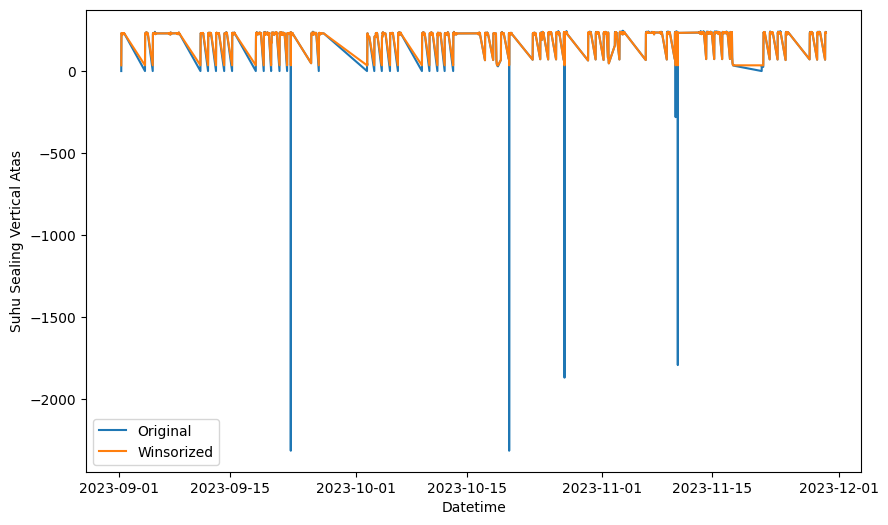

In [ ]:
# Make sure your DataFrame is sorted by datetime
df_adjustOutlier = df.sort_values('datetime')

# Applying winsorize to the 'suhu_sealing_vertical_atas' column
winsorized_values = winsorize(df_adjustOutlier['suhu_sealing_vertical_atas'], limits=(0.025, 0.025))

# Creating a new DataFrame with winsorized values
df_adjustOutlier = pd.DataFrame({'datetime': df_adjustOutlier['datetime'], 'suhu_sealing_vertical_atas': winsorized_values})

# Plotting the original and winsorized time series
plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['suhu_sealing_vertical_atas'], label='Original')
plt.plot(df['datetime'], winsorized_values, label='Winsorized')
plt.xlabel('Datetime')
plt.ylabel('Suhu Sealing Vertical Atas')
plt.legend()
plt.show()

In [ ]:
df_adjustOutlier.head()

,datetime,suhu_sealing_vertical_atas
0,2023-09-01 06:29:25,34.9
1,2023-09-01 06:31:14,38.2
2,2023-09-01 06:36:14,91.6
3,2023-09-01 06:41:14,129.5
4,2023-09-01 06:46:14,158.2


In [ ]:
df_adjustOutlier.describe().T

,count,mean,std,min,25%,50%,75%,max
suhu_sealing_vertical_atas,7622.0,219.372632,41.580801,34.9,229.2,229.4,234.2,234.9


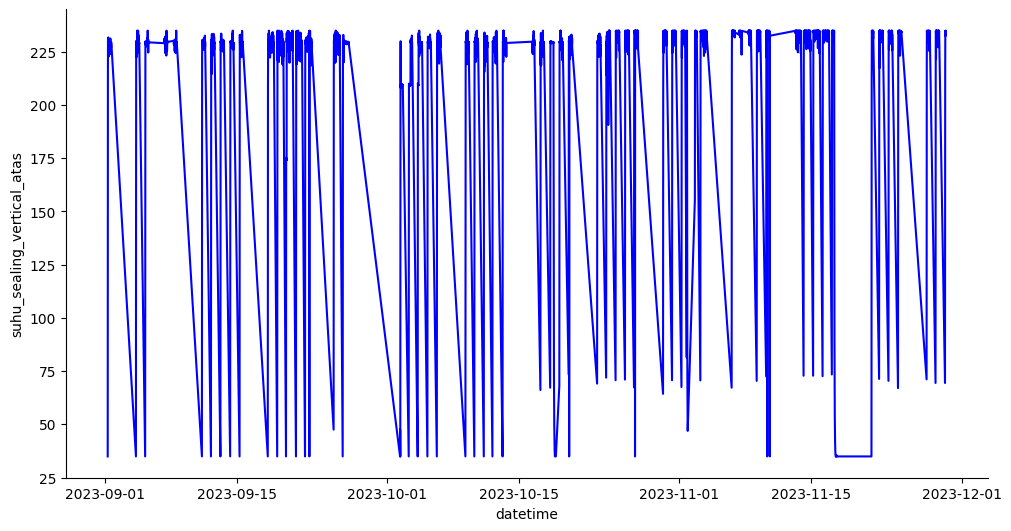

In [ ]:
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['datetime']
    ys = series['suhu_sealing_vertical_atas']

    plt.plot(xs, ys, label=series_name, color='blue')  # Change the color parameter to 'blue'

fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)  # Change layout='constrained' to constrained_layout=True
df_sorted = df_adjustOutlier.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('suhu_sealing_vertical_atas')

plt.show()

## Suhu Sealing Vertikal Bawah

In [ ]:
# Load data from Excel file

file_path = "/content/drive/MyDrive/Kalbe/suhu_sealing_vertical_bawah.csv" #Mendefinisikan variabel file_path yang berisi jalur file Excel yang akan dimuat

data = pd.read_csv(file_path) #Menggunakan fungsi read_excel dari pandas untuk membaca file Excel di jalur yang telah ditentukan (file_path) dan menyimpannya ke dalam variabel data.

data.head() #Menggunakan metode head() pada DataFrame untuk menampilkan beberapa baris pertama dari data yang telah dimuat

,datetime,suhu_sealing_vertical_bawah
0,2023-09-01 06:29:25,0.0
1,2023-09-01 06:31:14,43.1
2,2023-09-01 06:36:14,91.5
3,2023-09-01 06:41:14,132.3
4,2023-09-01 06:46:14,164.0


In [ ]:
data['datetime'] = pd.to_datetime(data['datetime']) #Baris kode ini digunakan untuk mengonversi kolom dengan nama 'times' dalam DataFrame data menjadi tipe data datetime menggunakan fungsi pd.to_datetime

In [ ]:
print("Rows and Columns = ", data.shape) #Ini memberikan informasi tentang ukuran (dimensi) DataFrame df.

Rows and Columns =  (7622, 2)


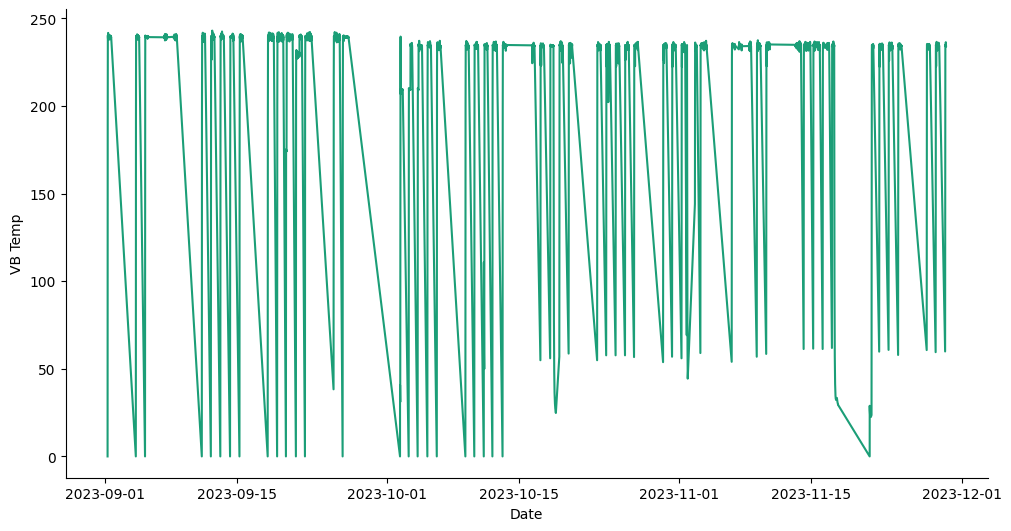

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['suhu_sealing_vertical_bawah']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('VB Temp')

In [ ]:
# Memisahkan data menjadi training dan validasi
train_data = data.iloc[:7264]
validation_data = data.iloc[7264:]

# Menampilkan informasi atau dimensi dari set pelatihan dan validasi
print("Jumlah data training:", len(train_data))
print("Jumlah data validasi:", len(validation_data))

Jumlah data training: 7264
Jumlah data validasi: 358


In [ ]:
# Print validation data
train_data.head()
train_data.shape
print(train_data)

                datetime  suhu_sealing_vertical_bawah
0    2023-09-01 06:29:25                          0.0
1    2023-09-01 06:31:14                         43.1
2    2023-09-01 06:36:14                         91.5
3    2023-09-01 06:41:14                        132.3
4    2023-09-01 06:46:14                        164.0
...                  ...                          ...
7259 2023-11-23 13:26:58                        234.4
7260 2023-11-23 13:31:58                        234.8
7261 2023-11-23 13:36:58                        233.7
7262 2023-11-23 13:41:58                        236.2
7263 2023-11-23 13:46:58                        233.9

[7264 rows x 2 columns]


In [ ]:
validation_data.head()
validation_data.shape
print(validation_data)

                datetime  suhu_sealing_vertical_bawah
7264 2023-11-23 13:51:58                        234.3
7265 2023-11-23 13:56:58                        234.5
7266 2023-11-23 14:01:58                        234.4
7267 2023-11-23 14:06:58                        234.2
7268 2023-11-23 14:11:58                        234.2
...                  ...                          ...
7617 2023-11-29 07:38:19                        233.9
7618 2023-11-29 07:43:19                        234.2
7619 2023-11-29 07:48:19                        234.5
7620 2023-11-29 07:53:19                        234.4
7621 2023-11-29 07:58:19                        234.4

[358 rows x 2 columns]


In [ ]:
from pmdarima import auto_arima

# The seasonal parameter is set to True to use SARIMA, otherwise it is just ARIMA
model = auto_arima(train_data['suhu_sealing_vertical_bawah'], seasonal=False, trace=True)

# Fit model with train_data
model.fit(train_data['suhu_sealing_vertical_bawah'])

# Perform predictions
forecast_validation = model.predict(n_periods=len(validation_data))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=62282.365, Time=15.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=62645.725, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=62631.190, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=62628.184, Time=1.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=62643.749, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=62281.056, Time=6.56 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=62574.787, Time=2.34 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=62287.887, Time=5.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=62282.543, Time=8.33 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=62513.625, Time=3.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=62280.879, Time=6.93 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=62593.144, Time=2.45 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=62282.484, Time=6.85 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=62558.390, Time=4.00 sec
 ARIMA(3,1,2)(0,0,

In [ ]:
# Rename columns for consistency with your friend's code
train_data = train_data.rename(columns={'datetime': 'ds', 'suhu_sealing_vertical_bawah': 'y'})
validation_data = validation_data.rename(columns={'datetime': 'ds', 'suhu_sealing_vertical_bawah': 'y'})

# Initialize ARIMA model with the best order (2, 1, 1). This order might change depending on your data.
model = ARIMA(train_data['y'], order=(2, 1, 1))

# Fit model with training data.
model_fit = model.fit()

# Get the number of forecast periods (size of the validation set).
number_of_forecast_periods = len(validation_data)

# Forecast using the ARIMA model for the duration of the validation set.
forecast_validation = model_fit.forecast(steps=number_of_forecast_periods)

# Convert the forecast from array to dataframe and add ds (datestamp) column
forecast_validation_df = pd.DataFrame(forecast_validation, columns=['yhat'])
forecast_validation_df['ds'] = validation_data['ds'].values

**Visualisasi Data antara Hasil Forecasting ARIMA dengan Data Validasi**

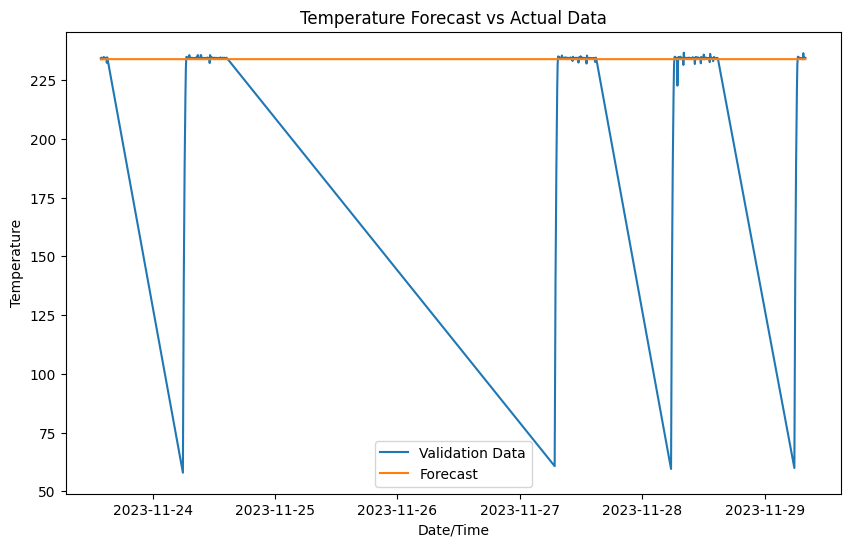

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(validation_data['ds'], validation_data['y'], label='Validation Data')
plt.plot(validation_data['ds'], forecast, label='Forecast')
plt.xlabel('Date/Time')
plt.ylabel('Temperature')
plt.title('Temperature Forecast vs Actual Data')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Convert validation_data['y'] and forecast to the same numpy array type
y_true = validation_data['y'].values

# If forecast is already a numpy array, we can directly use it

mse = mean_squared_error(y_true, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, forecast)
mape = np.mean(np.abs((forecast - y_true) / y_true)) * 100

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('Mean Absolute Percentage Error (MAPE):', mape)

Mean Squared Error (MSE): 712.9954238563897
Root Mean Squared Error (RMSE): 26.70197415653737
Mean Absolute Error (MAE): 6.7613306207270485
Mean Absolute Percentage Error (MAPE): 6.612375598067974


In [ ]:
# Create a DataFrame for forecasted values
forecast_df = pd.DataFrame(forecast, columns=['forecast'])

# Set date column for forecasted data (the same periods as in validation data)
forecast_df['date'] = validation_data['ds'].values

# Convert 'date' in forecast_df to datetime format if it's not in that format yet
forecast_df['date'] = pd.to_datetime(forecast_df['date'])

# Rename columns in validation_data for easy understanding
validation_data = validation_data.rename(columns={'ds': 'date', 'y': 'actual_value'})

# Convert 'date' in validation_data to datetime format if it's not already
validation_data['date'] = pd.to_datetime(validation_data['date'])

# Merge validation_data and forecast_df based on 'date' column
merged_data = pd.merge(validation_data.set_index('date'), forecast_df.set_index('date'), left_index=True, right_index=True)

# Show the merged data
merged_data[['actual_value', 'forecast']]

,actual_value,forecast
date,,
2023-11-23 13:51:58,234.3,233.734608
2023-11-23 13:56:58,234.5,233.761904
2023-11-23 14:01:58,234.4,233.783435
2023-11-23 14:06:58,234.2,233.800417
2023-11-23 14:11:58,234.2,233.813812
...,...,...
2023-11-29 07:38:19,233.9,233.863827
2023-11-29 07:43:19,234.2,233.863827
2023-11-29 07:48:19,234.5,233.863827


## Suhu Sealing Vertikal Atas

In [ ]:
# Load data from Excel file

file_path = "/content/drive/MyDrive/Kalbe/suhu_sealing_vertical_atas.csv" #Mendefinisikan variabel file_path yang berisi jalur file Excel yang akan dimuat

df2 = pd.read_csv(file_path) #Menggunakan fungsi read_excel dari pandas untuk membaca file Excel di jalur yang telah ditentukan (file_path) dan menyimpannya ke dalam variabel data.

df2.head() #Menggunakan metode head() pada DataFrame untuk menampilkan beberapa baris pertama dari data yang telah dimuat

,datetime,suhu_sealing_vertical_atas
0,2023-09-01 06:29:25,34.9
1,2023-09-01 06:31:14,38.2
2,2023-09-01 06:36:14,91.6
3,2023-09-01 06:41:14,129.5
4,2023-09-01 06:46:14,158.2


In [ ]:
df2['datetime'] = pd.to_datetime(df2['datetime']) #Baris kode ini digunakan untuk mengonversi kolom dengan nama 'times' dalam DataFrame data menjadi tipe data datetime menggunakan fungsi pd.to_datetime

In [ ]:
print("Rows and Columns = ", df2.shape) #Ini memberikan informasi tentang ukuran (dimensi) DataFrame df.

Rows and Columns =  (7622, 2)


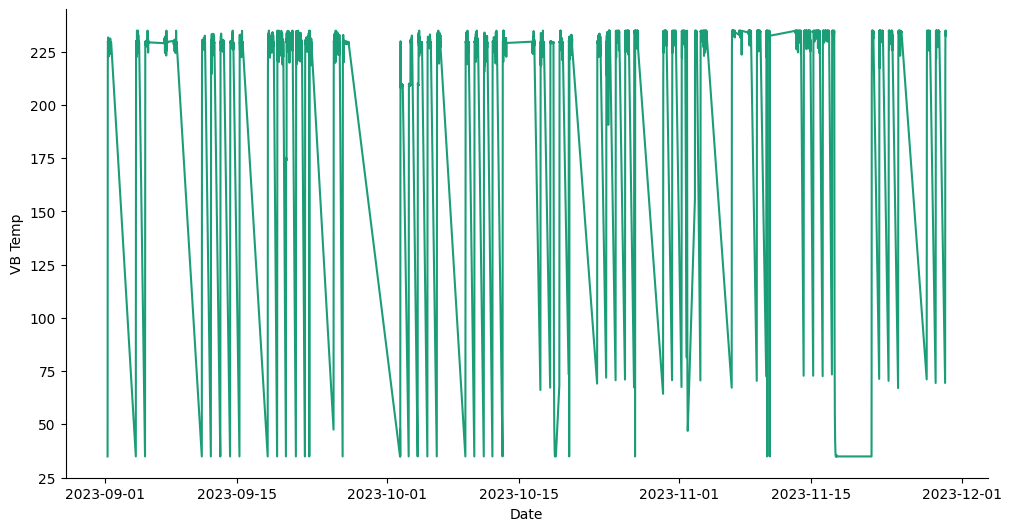

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['suhu_sealing_vertical_atas']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('VB Temp')

In [ ]:
# Memisahkan data menjadi training dan validasi
train_atas = df2.iloc[:7264]
validation_atas = df2.iloc[7264:]

# Menampilkan informasi atau dimensi dari set pelatihan dan validasi
print("Jumlah data training:", len(train_atas))
print("Jumlah data validasi:", len(validation_atas))

Jumlah data training: 7264
Jumlah data validasi: 358


In [ ]:
# Print validation data
train_atas.head()
train_atas.shape
print(train_atas)

                datetime  suhu_sealing_vertical_atas
0    2023-09-01 06:29:25                        34.9
1    2023-09-01 06:31:14                        38.2
2    2023-09-01 06:36:14                        91.6
3    2023-09-01 06:41:14                       129.5
4    2023-09-01 06:46:14                       158.2
...                  ...                         ...
7259 2023-11-23 13:26:58                       234.3
7260 2023-11-23 13:31:58                       234.8
7261 2023-11-23 13:36:58                       228.7
7262 2023-11-23 13:41:58                       234.9
7263 2023-11-23 13:46:58                       233.7

[7264 rows x 2 columns]


In [ ]:
validation_atas.head()
validation_atas.shape
print(validation_atas)

                datetime  suhu_sealing_vertical_atas
7264 2023-11-23 13:51:58                       233.7
7265 2023-11-23 13:56:58                       233.9
7266 2023-11-23 14:01:58                       234.1
7267 2023-11-23 14:06:58                       234.3
7268 2023-11-23 14:11:58                       234.3
...                  ...                         ...
7617 2023-11-29 07:38:19                       234.0
7618 2023-11-29 07:43:19                       233.7
7619 2023-11-29 07:48:19                       234.2
7620 2023-11-29 07:53:19                       234.1
7621 2023-11-29 07:58:19                       234.3

[358 rows x 2 columns]


In [ ]:
from pmdarima import auto_arima

# Assuming train_atas and validation_atas are your train and test datasets
train = train_atas['suhu_sealing_vertical_atas']
test = validation_atas['suhu_sealing_vertical_atas']

# Fit auto_arima function
model = auto_arima(train, start_p=1, start_q=1,
                   max_p=2, max_q=2, m=12,
                   start_P=0, seasonal=False,
                   d=1, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

# Print model summary
print(model.summary())

# Make predictions on test dataset
forecast = model.predict(n_periods=len(test))

# Create a comparison dataframe
compare_df = pd.DataFrame({'actual' : test, 'predicted': forecast})
print(compare_df)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=61575.552, Time=3.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=62021.598, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=61956.731, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=61943.848, Time=2.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=62019.616, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=61577.394, Time=5.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=61577.399, Time=3.37 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=61881.627, Time=2.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=61915.512, Time=1.01 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=61579.551, Time=9.25 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=61573.595, Time=0.88 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=61941.871, Time=0.64 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=61954.753, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=61575.436, Time=2.17 sec
 ARIMA(1,1,2)(0,0,0

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming train_atas and validation_atas are your train and test datasets
train = train_atas['suhu_sealing_vertical_atas']
test = validation_atas['suhu_sealing_vertical_atas']

# Fit ARIMA model (1, 1, 1)
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Make predictions on test dataset
start=len(train)
end=len(train) + len(test) - 1
predictions = model_fit.predict(start=start, end=end, typ='levels')

# Create a comparison dataframe
compare_df = pd.DataFrame({'actual' : test, 'predicted': predictions})
print(compare_df)

                                   SARIMAX Results                                    
Dep. Variable:     suhu_sealing_vertical_atas   No. Observations:                 7264
Model:                         ARIMA(1, 1, 1)   Log Likelihood              -30783.798
Date:                        Fri, 08 Mar 2024   AIC                          61573.595
Time:                                03:43:18   BIC                          61594.267
Sample:                                     0   HQIC                         61580.705
                                       - 7264                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7888      0.008     99.519      0.000       0.773       0.804
ma.L1         -0.9452      0.007   -142.855      0.000      -0.958 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


**Visualisasi data antara data sebenarnya dengan ARIMA forecasting**

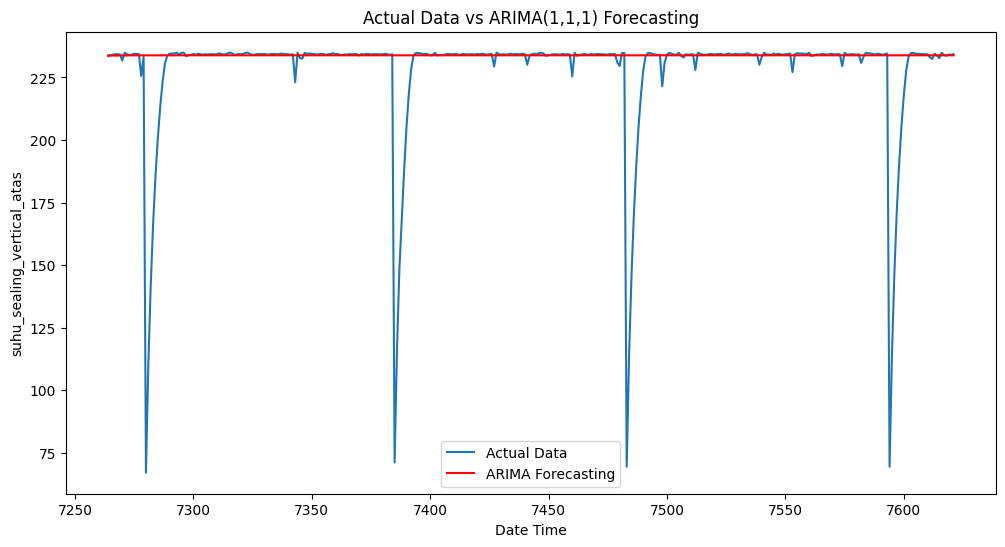

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(compare_df['actual'], label='Actual Data')
plt.plot(compare_df['predicted'], color='red', label='ARIMA Forecasting')
plt.xlabel('Date Time')
plt.ylabel('suhu_sealing_vertical_atas')
plt.title('Actual Data vs ARIMA(1,1,1) Forecasting')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(compare_df['actual'], compare_df['predicted'])
print('Mean Absolute Error:', mae)

# Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(compare_df['actual'], compare_df['predicted']))
print('Root Mean Squared Error:', rmse)

# Calculate the Mean Absolute Percentage Error (MAPE)
y_true, y_pred = np.array(compare_df['actual']), np.array(compare_df['predicted'])
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print('Mean Absolute Percentage Error:', mape, '%')

# Calculate the Mean Percentage Error (MPE)
mpe = np.mean((y_true - y_pred) / y_true) * 100
print('Mean Percentage Error:', mpe, '%')

Mean Absolute Error: 6.6891565131093405
Root Mean Squared Error: 25.29473610565023
Mean Absolute Percentage Error: 5.80831625032695 %
Mean Percentage Error: -5.473696853448817 %
